In [85]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
runs = ELPH_utils.load_runs()

runs_w002 = ELPH_utils.load_runs(filename='../runs_w0.02.npz')
runs_w003 = ELPH_utils.load_runs(filename='../runs_w0.03.npz')
runs_w01 = ELPH_utils.load_runs(filename='../runs_w0.1.npz')

runs = runs[:] + runs_w002[:] + runs_w003 + runs_w01

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

400 loaded with n_kmax = 80


runs[0] shape:  (80, 400)


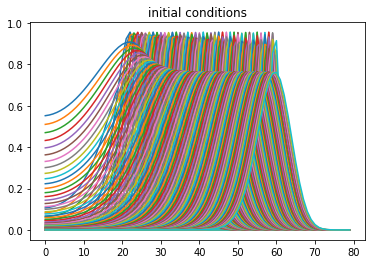

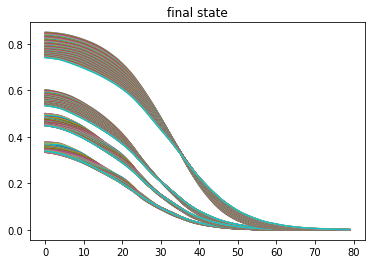

In [133]:
print('runs[0] shape: ', runs[0].shape)

for k in range(n_runs):
    plt.plot(runs[k][:,0])

plt.title('initial conditions')
plt.show()


for k in range(n_runs):
    plt.plot(runs[k][:,-1])

plt.title('final state')
plt.show()

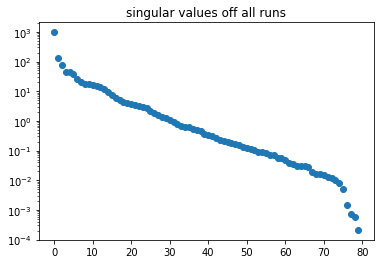

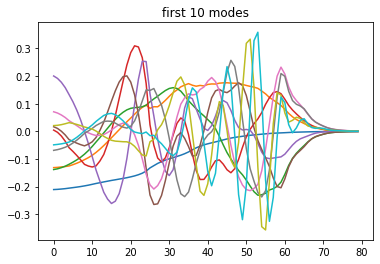

In [142]:
from ELPH_SVDAPPRX import SVDAPPRX

model = SVDAPPRX(runs)
model.train()

plt.semilogy(model.S, 'o')
plt.title('singular values off all runs')
plt.show()

rdim = 10

for l in range(rdim):
  plt.plot(model.U[:,l],  label='Uhat_'+str(l))
plt.title('first ' + str(rdim) + ' modes')
plt.show()


0.0980364031167833


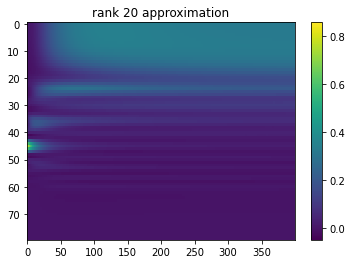

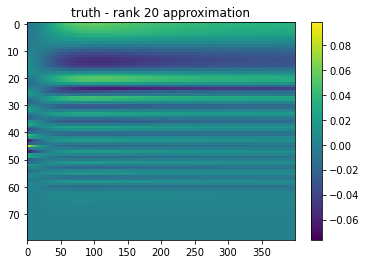

In [157]:
from ELPH_SVDAPPRX import SVDAPPRX


train_runs = runs[::1]
test_run = train_runs.pop(150).copy()


model = SVDAPPRX(train_runs)

wcols = 0.0 + 100*np.exp(-90.*np.linspace(0,1,nCols))

model.train(wcols=wcols)


rdim = 20
recon = model.approx_single_run(test_run, rdim=rdim)
print(model.get_error(test_run, recon, norm='max'))

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('rank ' + str(rdim) + ' approximation')
plt.show()

plt.imshow(test_run - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('truth - rank ' + str(rdim) + ' approximation')
plt.show()

In [169]:
wcols = 1.0 + 10*np.exp(-10.*np.linspace(0,1,nCols))

m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':20, 'wcols':wcols}, score_kwargs={'norm':'max'})
print(m)
print(s)

0.043263934340401336
[0.03788637957688269, 0.046506743280340726, 0.0424236116363529, 0.048899160187241344, 0.040603777021189]


In [170]:
SVD_approx_err = np.zeros(30)
for rdim in range(n_kmax):
    SVD_approx_err[rdim] = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':rdim+1}, score_kwargs={'norm':'max'})[0]
    


IndexError: index 30 is out of bounds for axis 0 with size 30

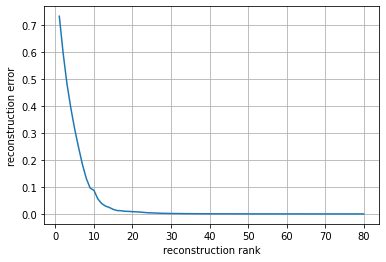

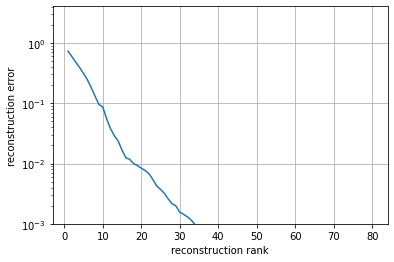

In [8]:
plt.grid()
plt.plot(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.show()

plt.grid()
plt.semilogy(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.ylim(1e-3,)
plt.show()